In [58]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import LinearSVC


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint

from keras.models import Sequential
from keras.layers import InputLayer, Dense, BatchNormalization
from keras.callbacks import ModelCheckpoint



**Custom functions**

In [59]:
def Robust_Scaler_M(df,coloumns_to_scale):
    new_df = df.copy()
    rc = RobustScaler()
    for c in coloumns_to_scale:
      new_df[c]= rc.fit_transform(new_df[c].to_numpy().reshape(-1,1))

    return new_df

#coloumns_to_scale =['Time','Amount']
#Call this fucntion Robust_Scaler_M(df,coloumns_to_scale)

In [60]:
def df_split(preprocessed_df):
    train, test, val =preprocessed_df[:240000], preprocessed_df[240000:262000], preprocessed_df[262000:]
    train['Class'].value_counts(), test['Class'].value_counts(), val['Class'].value_counts()
    train_np, test_np, val_np = train.to_numpy(), test.to_numpy(), val.to_numpy()
    train_np.shape, test_np.shape, val_np.shape
    x_train, y_train = train_np[:,:-1], train_np[:,-1]
    x_test, y_test = test_np[:,:-1], test_np[:,-1]
    x_val, y_val = val_np[:,:-1], val_np[:,-1]
    x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_val.shape, y_val.shape
    print("Shapes:")
    print("X_train:", X_train.shape)
    print("X_temp:", X_temp.shape)
    print("y_train:", y_train.shape)
    print("y_temp:", y_temp.shape)
    print("X_test:", X_test.shape)
    print("X_val:", X_val.shape)
    print("y_test:", y_test.shape)
    print("y_val:", y_val.shape)
    return x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_val.shape, y_val.shape


#Call this fucntion
#X_train, X_test, X_val, y_train, y_test, y_val_1 = df_split(new_df)

**Alternative way using train_test_split**


In [61]:
def t_t_s_skl(preprocessed_df, train_test_size, val_size):
    X = preprocessed_df.drop(columns=['Class'])
    y = preprocessed_df['Class']

    X_train_1, X_temp_1, y_train_1, y_temp_1 = train_test_split(X, y, test_size=train_test_size, random_state=42)
    X_test_1, X_val_1, y_test_1, y_val_1 = train_test_split(X_temp_1, y_temp_1, test_size=val_size, random_state=42)

    print("Shapes:")
    print("X_train:", X_train_1.shape)
    print("X_temp:", X_temp_1.shape)
    print("y_train:", y_train_1.shape)
    print("y_temp:", y_temp_1.shape)
    print("X_test:", X_test_1.shape)
    print("X_val:", X_val_1.shape)
    print("y_test:", y_test_1.shape)
    print("y_val:", y_val_1.shape)

    return X_train_1, X_test_1, X_val_1, y_train_1, y_test_1, y_val_1

# Call this function
#X_train, X_test, X_val, y_train, y_test, y_val = t_t_s_skl(new_df, 0.2, 0.5)

Model training Functions

In [62]:
def logistic_regression(X_train, y_train, X_test, y_test, X_val, y_val):
    l_m = LogisticRegression()
    l_m.fit(X_train, y_train)

    t_train_pred_l_m = l_m.predict(X_train)
    y_test_pred_l_m = l_m.predict(X_test)
    y_val_pred_l_m = l_m.predict(X_val)

    y_test_pred_prob_l_m = l_m.predict_proba(X_test)[:, 1]
    y_val_pred_prob_l_m = l_m.predict_proba(X_val)[:, 1]

    train_clf_report = classification_report(y_train, t_train_pred_l_m, target_names=['Not Fraud', 'Fraud'])
    test_clf_report = classification_report(y_test, y_test_pred_l_m, target_names=['Not Fraud', 'Fraud'])
    val_clf_report = classification_report(y_val, y_val_pred_l_m, target_names=['Not Fraud', 'Fraud'])

    print("Metrics for the train data:\n", train_clf_report)
    print("Metrics for the test data:\n", test_clf_report)
    print("Metrics for the validation data:\n", val_clf_report)

    fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_prob_l_m)
    roc_auc = auc(fpr, tpr)

    return l_m, y_val_pred_l_m, y_val_pred_prob_l_m, fpr, tpr, thresholds, roc_auc

# Call this function with the appropriate data
#l_m, y_val_pred, y_val_pred_prob, fpr, tpr, thresholds, roc_auc = logistic_regression(X_train, y_train, X_test, y_test, X_val, y_val)


In [63]:

def neural_net(X_train, y_train, X_val, y_val):

    shallow_nn = Sequential()
    shallow_nn.add(InputLayer((X_train.shape[1],)))
    shallow_nn.add(Dense(2, activation='relu'))
    shallow_nn.add(BatchNormalization())
    shallow_nn.add(Dense(1, activation='sigmoid'))

    shallow_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    checkpoint = ModelCheckpoint('shallow_nn', save_best_only=True)

    summary = shallow_nn.summary()
    summary
    num_epochs = int(input("Enter the number of epochs: "))
    shallow_model = shallow_nn.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=num_epochs, callbacks=[checkpoint])
    return summary, shallow_nn
#Call this Function by # summary, shallow_nn_model= neural_net(X_train, y_train, X_val, y_val

In [64]:
def random_forest(max_depth, n_jobs, X_train, y_train, X_val, y_val):
    rf = RandomForestClassifier(max_depth=max_depth, n_jobs=n_jobs)
    rf.fit(X_train, y_train)

    y_val_pred = rf.predict(X_val)
    print("Classification Report for Validation Data:")
    print(classification_report(y_val, y_val_pred, target_names=['Not Fraud', 'Fraud']))

    return rf
#Call this fucntion by # rf_model = random_forest(50,-1,X_train,y_train)

In [55]:

def G_B_C(n_estimators,learning_rate, max_depth, X_train, y_train):
    gbc = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=1, random_state=0)
    gbc.fit(X_train, y_train)
    print(classification_report(y_val, gbc.predict(X_val), target_names=['Not Fraud', 'Fraud']))
    return gbc

# Call this fucntion by # g_b_c_model = G_B_C(50,1.0, 1, X_train, y_train)

*Confusion matrix*

In [65]:

def C_M_val(y_val, y_val_pred_l_m):
    # Assuming you have y_true and y_pred defined
    cm = confusion_matrix(y_val, y_val_pred_l_m)

    # Plot Confusion Matrix as Heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix for the validation set')
    plt.show()
# Call this function by C_M_val(y_val, y_val_pred)

*ROC Curve*

In [66]:
def plot_ROC_C(y_val, y_val_pred_prob_l_m):
    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(y_val, y_val_pred_prob_l_m)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
#Call this function by: plot_ROC_C(y_val, y_val_pred_prob_l_m)

In [ ]:
________________________________________________________________________________________________________________________________________________________

*Predict using differnt models*

In [ ]:

def predict_m(model, X_train):
    return (model.predict(X_train).flatten() > 0.5).astype(int)

#Call  this function by # predict_m(shallow_nn, X_train)

models = ['shallow_nn_model','l_m','rf_model','g_b_c_model','S_V_C_model']

In [ ]:
predict_m(shallow_nn, X_train)

**Balance dataframe with 50% of each classes**

In [67]:
def dataframe_b(unbalanced_df):
    not_frauds = new_df.query('Class == 0')
    frauds = new_df.query('Class == 1')
    not_frauds['Class'].value_counts(), frauds['Class'].value_counts()
    balanced_dataframe= unbalanced_df.sample(len(frauds), random_state=33)
    balanced_dataframe = unbalanced_df.sample(frac=1, random_state=1)
    return balanced_dataframe

# Call this fucntion by balanced_dataframe = dataframe_b(new_df)

In [68]:
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [69]:
!unzip /content/drive/MyDrive/CApstone_Project/Credit_Card_Fraud.zip


Archive:  /content/drive/MyDrive/CApstone_Project/Credit_Card_Fraud.zip
replace Credit_Card_Fraud/Credit_Card_Fraud_ProblemStatement.docx? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [71]:
df = pd.read_csv('/content/Credit_Card_Fraud/creditcard.csv')
df


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
df['Class'].value_counts()


In [ ]:
df.hist(bins=20, figsize=(30,30))


In [ ]:
df.describe()


In [ ]:
df['Class'].unique()


In [ ]:
new_df['Amount'][(new_df['Amount']>50)].hist(bins=20, figsize=(10,10))


In [ ]:
df['Amount'].dtypes

**WORKFLOW**

**Pre-Processing**

In [72]:
coloumns_to_scale =['Time','Amount']
new_df =Robust_Scaler_M(df,coloumns_to_scale)

**data spliting for the model traing and testing**

In [73]:
X_train, X_test, X_val, y_train, y_test, y_val = t_t_s_skl(new_df, 0.2, 0.5)

Shapes:
X_train: (227845, 30)
X_temp: (56962, 30)
y_train: (227845,)
y_temp: (56962,)
X_test: (28481, 30)
X_val: (28481, 30)
y_test: (28481,)
y_val: (28481,)


**Training the model**

In [ ]:
#y_test_pred,y_test_pred_score, y_val_pred, y_val_pred_score = logistic_regression(X_train, y_train)

In [ ]:
l_m, y_val_pred, y_val_pred_prob, fpr, tpr, thresholds, roc_auc = logistic_regression(X_train, y_train, X_test, y_test, X_val, y_val)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Metrics for the train data:
               precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00    227451
       Fraud       0.90      0.63      0.74       394

    accuracy                           1.00    227845
   macro avg       0.95      0.81      0.87    227845
weighted avg       1.00      1.00      1.00    227845

Metrics for the test data:
               precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     28426
       Fraud       0.84      0.58      0.69        55

    accuracy                           1.00     28481
   macro avg       0.92      0.79      0.84     28481
weighted avg       1.00      1.00      1.00     28481

Metrics for the validation data:
               precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     28438
       Fraud       0.89      0.58      0.70        43

    accuracy                           1.00     28481
   macro avg       0.95      0.79    

**Evaluation metrics**

Logistics regression model

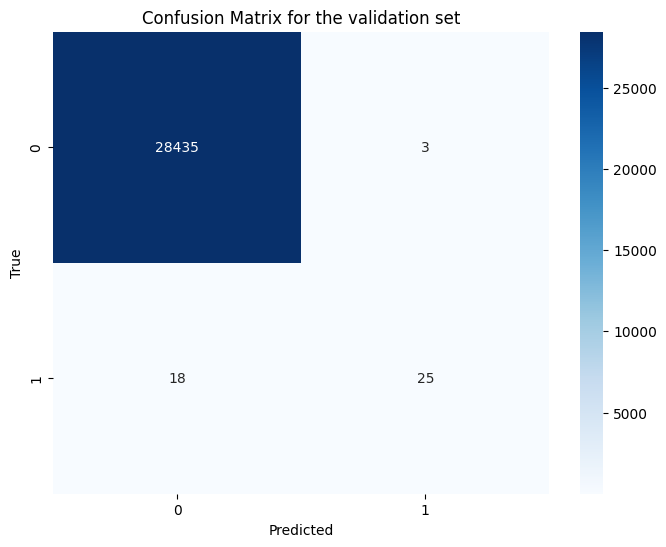

In [ ]:
C_M_val(y_val, y_val_pred)

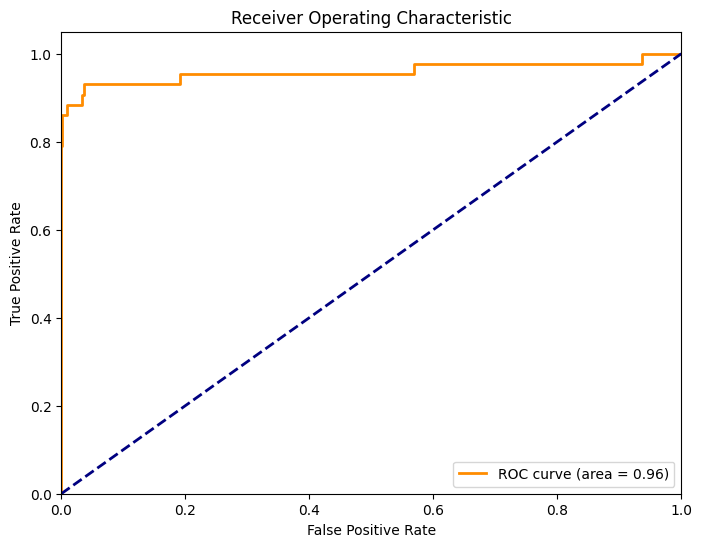

In [ ]:
plot_ROC_C(y_val, y_val_pred_prob)

Tensorflow, Neural network

In [ ]:
summary, shallow_nn_model= neural_net(X_train, y_train, X_val, y_val)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 2)                 62        
                                                                 
 batch_normalization_1 (Batc  (None, 2)                8         
 hNormalization)                                                 
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 73
Trainable params: 69
Non-trainable params: 4
_________________________________________________________________
Enter the number of epochs: 5
Epoch 1/5
7110/7121 [============================>.] - ETA: 0s - loss: 0.0528 - accuracy: 0.9883

7121/7121 [==============================] - 23s 3ms/step - loss: 0.0527 - accuracy: 0.9883 - val_loss: 0.0046 - val_accuracy: 0.9994
Epoch 2/5
7121/7121 [==============================] - 22s 3ms/step - loss: 0.0033 - accuracy: 0.9994 - val_loss: 0.0046 - val_accuracy: 0.9994
Epoch 3/5
7121/7121 [==============================] - 21s 3ms/step - loss: 0.0033 - accuracy: 0.9993 - val_loss: 0.0050 - val_accuracy: 0.9993
Epoch 4/5
7119/7121 [============================>.] - ETA: 0s - loss: 0.0032 - accuracy: 0.9994

7121/7121 [==============================] - 21s 3ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.0046 - val_accuracy: 0.9993
Epoch 5/5
7121/7121 [==============================] - 23s 3ms/step - loss: 0.0033 - accuracy: 0.9994 - val_loss: 0.0049 - val_accuracy: 0.9992


In [ ]:
print(classification_report(y_val, predict_m(shallow_nn_model, X_val), target_names=['Not Fraud','Fraud']))


891/891 [==============================] - 2s 2ms/step
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     28438
       Fraud       0.72      0.79      0.76        43

    accuracy                           1.00     28481
   macro avg       0.86      0.90      0.88     28481
weighted avg       1.00      1.00      1.00     28481



891/891 [==============================] - 1s 2ms/step


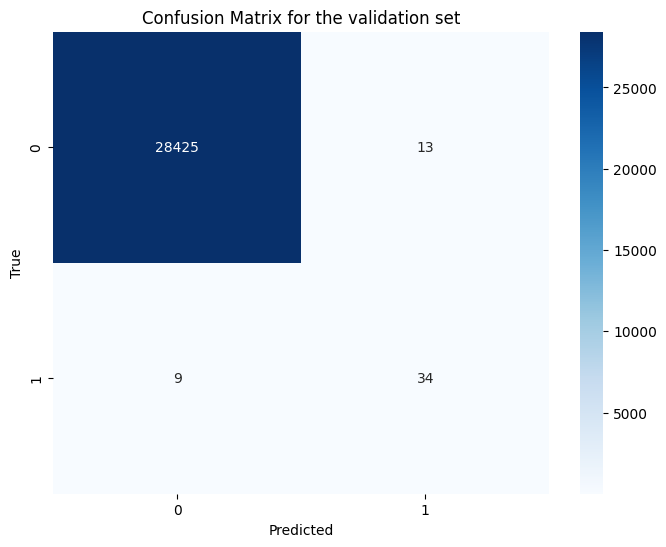

In [ ]:
C_M_val(y_val, predict_m(shallow_nn_model, X_val))

*RandomForestClassifier*

In [ ]:
rf_model = random_forest(50,-1,X_train, y_train, X_val, y_val)


Classification Report for Validation Data:
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     28438
       Fraud       0.97      0.79      0.87        43

    accuracy                           1.00     28481
   macro avg       0.99      0.90      0.94     28481
weighted avg       1.00      1.00      1.00     28481



*GradientBoostingClassifier*

In [ ]:
g_b_c_model= G_B_C(50,1.0, 1, X_train, y_train)



              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     28438
       Fraud       0.68      0.70      0.69        43

    accuracy                           1.00     28481
   macro avg       0.84      0.85      0.84     28481
weighted avg       1.00      1.00      1.00     28481



*LinearSVC*

In [ ]:

def S_V_C(X_train,y_train):
    svc = LinearSVC(class_weight='balanced')
    svc.fit(X_train, y_train)
    print(classification_report(y_val, svc.predict(X_val), target_names=['Not Fraud', 'Fraud']))
    return svc

#Call this fucntion by # S_V_C_model = S_V_C(X_train,y_train)

In [ ]:
S_V_C_model = S_V_C(X_train,y_train)


              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     28438
       Fraud       0.75      0.70      0.72        43

    accuracy                           1.00     28481
   macro avg       0.87      0.85      0.86     28481
weighted avg       1.00      1.00      1.00     28481



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


**Balanced Dataframe on previous models**

In [74]:
def dataframe_b(unbalanced_df):
    not_frauds = new_df.query('Class == 0')
    frauds = new_df.query('Class == 1')
    not_frauds['Class'].value_counts(), frauds['Class'].value_counts()
    balanced_dataframe= unbalanced_df.sample(len(frauds), random_state=33)
    balanced_dataframe = unbalanced_df.sample(frac=1, random_state=1)
    return balanced_dataframe

# Call this fucntion by balanced_dataframe = dataframe_b(new_df)

In [75]:
balanced_dataframe = dataframe_b(new_df)

In [76]:
X_train_b, X_test_b, X_val_b, y_train_b, y_test_b, y_val_b = t_t_s_skl(balanced_dataframe, 0.2, 0.5)

Shapes:
X_train: (227845, 30)
X_temp: (56962, 30)
y_train: (227845,)
y_temp: (56962,)
X_test: (28481, 30)
X_val: (28481, 30)
y_test: (28481,)
y_val: (28481,)


*LogisticRegression*

In [79]:
l_m, y_val_pred_b, y_val_pred_prob_b, fpr_b, tpr_b, thresholds_b, roc_auc_b = logistic_regression(X_train_b, y_train_b, X_test_b, y_test_b, X_val_b, y_val_b)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Metrics for the train data:
               precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00    227440
       Fraud       0.87      0.61      0.72       405

    accuracy                           1.00    227845
   macro avg       0.93      0.81      0.86    227845
weighted avg       1.00      1.00      1.00    227845

Metrics for the test data:
               precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     28436
       Fraud       0.90      0.58      0.70        45

    accuracy                           1.00     28481
   macro avg       0.95      0.79      0.85     28481
weighted avg       1.00      1.00      1.00     28481

Metrics for the validation data:
               precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     28439
       Fraud       0.90      0.62      0.73        42

    accuracy                           1.00     28481
   macro avg       0.95      0.81    

*Neural net model on the balanced data*

In [91]:
summary, shallow_nn_model_b= neural_net(X_train_b, y_train_b, X_val_b, y_val_b)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 2)                 62        
                                                                 
 batch_normalization_4 (Batc  (None, 2)                8         
 hNormalization)                                                 
                                                                 
 dense_9 (Dense)             (None, 1)                 3         
                                                                 
Total params: 73
Trainable params: 69
Non-trainable params: 4
_________________________________________________________________
Enter the number of epochs: 5
Epoch 1/5
7121/7121 [==============================] - ETA: 0s - loss: 0.0534 - accuracy: 0.9846

7121/7121 [==============================] - 22s 3ms/step - loss: 0.0534 - accuracy: 0.9846 - val_loss: 0.0087 - val_accuracy: 0.9994
Epoch 2/5
7107/7121 [============================>.] - ETA: 0s - loss: 0.0037 - accuracy: 0.9993

7121/7121 [==============================] - 19s 3ms/step - loss: 0.0037 - accuracy: 0.9993 - val_loss: 0.0086 - val_accuracy: 0.9994
Epoch 3/5
7121/7121 [==============================] - 19s 3ms/step - loss: 0.0036 - accuracy: 0.9993 - val_loss: 0.0087 - val_accuracy: 0.9994
Epoch 4/5
7107/7121 [============================>.] - ETA: 0s - loss: 0.0035 - accuracy: 0.9993

7121/7121 [==============================] - 23s 3ms/step - loss: 0.0034 - accuracy: 0.9993 - val_loss: 0.0081 - val_accuracy: 0.9995
Epoch 5/5
7109/7121 [============================>.] - ETA: 0s - loss: 0.0035 - accuracy: 0.9993

7121/7121 [==============================] - 19s 3ms/step - loss: 0.0035 - accuracy: 0.9993 - val_loss: 0.0079 - val_accuracy: 0.9994


In [92]:
print(classification_report(y_val_b,predict_m(shallow_nn_model_b, X_val_b), target_names=['Not Fraud','Fraud'] ))

891/891 [==============================] - 2s 2ms/step
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     28439
       Fraud       0.82      0.79      0.80        42

    accuracy                           1.00     28481
   macro avg       0.91      0.89      0.90     28481
weighted avg       1.00      1.00      1.00     28481



RandomForestClassifier

In [83]:
rf_model = random_forest(50,-1,X_train, y_train, X_val, y_val)


Classification Report for Validation Data:
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     28438
       Fraud       0.94      0.79      0.86        43

    accuracy                           1.00     28481
   macro avg       0.97      0.90      0.93     28481
weighted avg       1.00      1.00      1.00     28481



GradientBoostingClassifier on the balanced data

In [82]:
g_b_c_model= G_B_C(50,1.0, 1, X_train_b, y_train_b)


              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     28438
       Fraud       0.68      0.70      0.69        43

    accuracy                           1.00     28481
   macro avg       0.84      0.85      0.84     28481
weighted avg       1.00      1.00      1.00     28481



Support Vector Classifier on the balanced data

In [80]:
S_V_C_model = S_V_C(X_train_b,y_train_b)


              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     28438
       Fraud       0.79      0.70      0.74        43

    accuracy                           1.00     28481
   macro avg       0.89      0.85      0.87     28481
weighted avg       1.00      1.00      1.00     28481



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
